In [1]:
import geostatspy.GSLIB as GSLIB
import geostatspy.geostats as geostats

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats

In [8]:
os.chdir("C:/Users\Jorge\Desktop\sgem datos")

In [13]:
df=pd.read_csv('sample_data_biased.txt')
#df.head(n=13)
df.head()

,X,Y,Facies,Porosity,Perm
0,100,900,1,0.115359,5.736104
1,100,800,1,0.136425,17.211462
2,100,600,1,0.135810,43.724752
3,100,500,0,0.094414,1.609942
4,100,100,0,0.113049,10.886001


In [14]:
df.describe()

,X,Y,Facies,Porosity,Perm
count,289.000000,289.000000,289.000000,289.000000,289.000000
mean,475.813149,529.692042,0.813149,0.134744,207.832368
std,254.277530,300.895374,0.390468,0.037745,559.359350
min,0.000000,9.000000,0.000000,0.058548,0.075819
25%,300.000000,269.000000,1.000000,0.106318,3.634086
50%,430.000000,549.000000,1.000000,0.126167,14.908970
75%,670.000000,819.000000,1.000000,0.154220,71.454424
max,990.000000,999.000000,1.000000,0.228790,5308.842566


In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,289.0,475.813149,254.277530,0.000000,300.000000,430.000000,670.000000,990.000000
Y,289.0,529.692042,300.895374,9.000000,269.000000,549.000000,819.000000,999.000000
Facies,289.0,0.813149,0.390468,0.000000,1.000000,1.000000,1.000000,1.000000
Porosity,289.0,0.134744,0.037745,0.058548,0.106318,0.126167,0.154220,0.228790
Perm,289.0,207.832368,559.359350,0.075819,3.634086,14.908970,71.454424,5308.842566


In [70]:
Xmin=0.0;Xmax=1000
Ymin=0.0;Ymax=1000
Porositymin=0.05;Porositymax=0.25
cmap=plt.cm.plasma
GSLIB.locmap

<function geostatspy.GSLIB.locmap(df, xcol, ycol, vcol, xmin, xmax, ymin, ymax, vmin, vmax, title, xlabel, ylabel, vlabel, cmap, fig_name)>

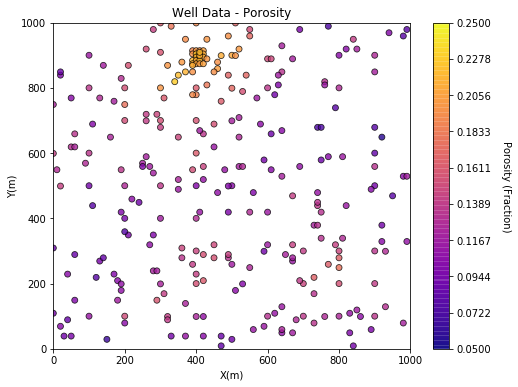

In [75]:
GSLIB.locmap(df,'X','Y','Porosity',Xmin,Xmax,Ymin,Ymax,Porositymin,Porositymax,'Well Data - Porosity','X(m)','Y(m)',
             'Porosity (Fraction)',cmap,'locmap_Porosity')

In [68]:
geostats.declus

<function geostatspy.geostats.declus(df, xcol, ycol, vcol, iminmax, noff, ncell, cmin, cmax)>

In [74]:
wts,cell_sizes,dmeans=geostats.declus(df,'X','Y','Porosity',iminmax=1,noff=10,ncell=100,cmin=10,cmax=2000)
df['Wts']=wts
df.head()

There are 289 data with:
   mean of      0.13474387540138408 
   min and max  0.058547873 and 0.228790002
   standard dev 0.03767982164385207 


,X,Y,Facies,Porosity,Perm,Wts
0,100,900,1,0.115359,5.736104,3.064286
1,100,800,1,0.136425,17.211462,1.076608
2,100,600,1,0.135810,43.724752,0.997239
3,100,500,0,0.094414,1.609942,1.165119
4,100,100,0,0.113049,10.886001,1.224164


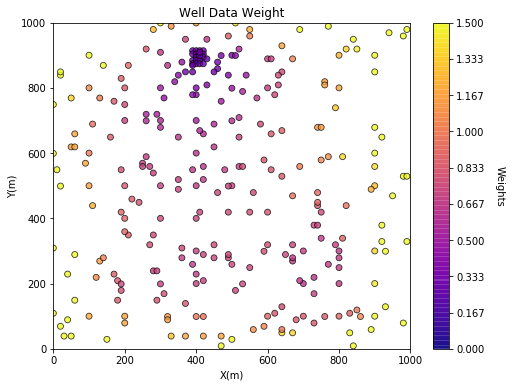

In [97]:
GSLIB.locmap(df,'X','Y','Wts',Xmin,Xmax,Ymin,Ymax,0.0,1.5,'Well Data Weight','X(m)','Y(m)','Weights',cmap,'locmap_Weights')

Porosity naive mean is 0.135.
Porosity declustered mean is 0.121.
Correction of 0.1002.
Summary statistics of the declustering weights:
DescribeResult(nobs=289, minmax=(0.2819756671865989, 3.984325446814365), mean=0.9999999999999996, variance=0.40927076480664726, skewness=1.9395015754905447, kurtosis=4.287460624778004)


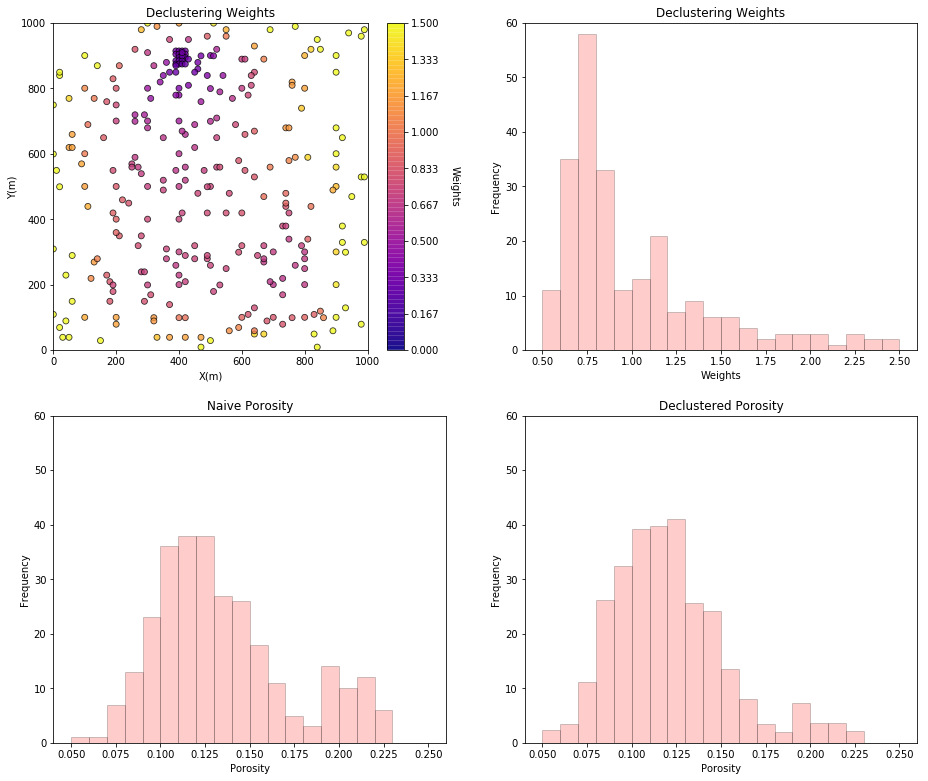

In [124]:
plt.subplot(221)
GSLIB.locmap_st(df,'X','Y','Wts',Xmin,Xmax,Ymin,Ymax,0,1.5,'Declustering Weights','X(m)','Y(m)','Weights',cmap)

plt.subplot(222)
GSLIB.hist_st(df['Wts'],0.5,2.5,log=False,cumul=False,bins=20,weights=None,xlabel="Weights",title="Declustering Weights")
plt.ylim(0,60)

plt.subplot(223)
GSLIB.hist_st(df['Porosity'],0.05,0.25,log=False,cumul=False,bins=20,weights=None,xlabel="Porosity",title="Naive Porosity")
plt.ylim(0,60)

plt.subplot(224)
GSLIB.hist_st(df['Porosity'],0.05,0.25,log=False,cumul=False,bins=20,weights=df['Wts'],xlabel="Porosity",
              title="Declustered Porosity")
plt.ylim(0,60)

por_mean=np.average(df['Porosity'].values)
por_dmean=np.average(df['Porosity'].values,weights=df['Wts'].values)

print('Porosity naive mean is '+str(round(por_mean,3))+'.')
print('Porosity declustered mean is '+str(round(por_dmean,3))+'.')
cor=(por_mean-por_dmean)/por_mean
print('Correction of '+str(round(cor,4))+'.')

print('Summary statistics of the declustering weights:')
print(stats.describe(wts))

plt.subplots_adjust(left=0,bottom=0,right=2,top=2.5,wspace=0.2,hspace=0.2)
plt.show()

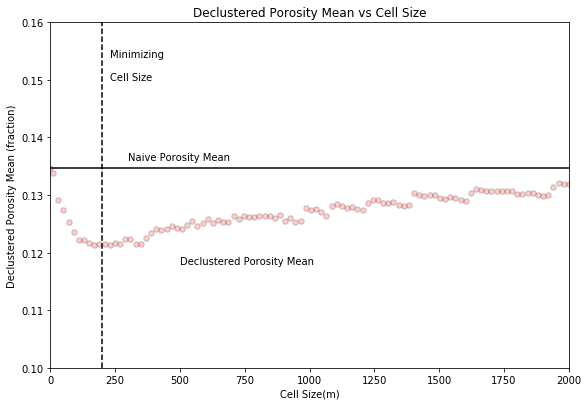

In [143]:
plt.subplot(111)
plt.scatter(cell_sizes,dmeans,s=30,alpha=0.2,edgecolors="black",facecolors='red')
plt.xlabel('Cell Size(m)')
plt.ylabel('Declustered Porosity Mean (fraction)')
plt.title('Declustered Porosity Mean vs Cell Size')
plt.plot([0,2000],[por_mean,por_mean],color='black')
plt.plot([200,200],[0.1,0.16],color='black',linestyle='dashed')
plt.text(300,0.136,r'Naive Porosity Mean')   #solo es un texto a la altura del punto indicado
plt.text(500,0.118,r'Declustered Porosity Mean')   #solo es un texto a la altura del punto indicado
plt.text(230,0.154,r'Minimizing')   #solo es un texto a la altura del punto indicado
plt.text(230,0.150,r'Cell Size')   #solo es un texto a la altura del punto indicado
plt.ylim(0.10,0.16)
plt.xlim(0,2000)
plt.subplots_adjust(left=0,bottom=0,right=1.2,top=1.2,wspace=0.2,hspace=0.2)   #Acomoda la imagen
plt.show()